# Basic Model Training

## Aims
* Using the `compound_rings` data and associated images to train a basic model 

In [21]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

## Setup
Any parameters are set up here.

In [8]:
model_version = "v1"
image_size = (300, 300)
batch_size = 32
val_split = 0.2

## Load Data
Using Keras pre-processing to load our data into a train/test data set and a validation data set. Here we can set the seeds so later splits are consistent.

In [9]:
import pandas as pd 
compound_df = pd.read_csv("data/compound_rings.csv")
display(compound_df)

,compound_id,num_rings,image
0,1117973,5.0,images/1117973.png
1,694811,4.0,images/694811.png
2,1282795,4.0,images/1282795.png
3,1424122,5.0,images/1424122.png
4,1279938,3.0,images/1279938.png
...,...,...,...
95,1524804,3.0,images/1524804.png
96,1524811,3.0,images/1524811.png
97,1442535,3.0,images/1442535.png
98,1442562,3.0,images/1442562.png


In [17]:
compound_image_data = []
compound_ring_cats = []
for row in compound_df.iterrows():
    compound_image_data.append(plt.imread(row[1]["image"]))
    compound_ring_cats.append(int(row[1]["num_rings"]))

compound_image_data = np.array(compound_image_data)
compound_ring_cats = np.array(compound_ring_cats)

In [18]:
compound_ring_cats.shape, compound_image_data.shape

((100,), (100, 300, 300, 3))

In [22]:
X_train, X_test, y_train, y_test = train_test_split(compound_image_data, compound_ring_cats, test_size=0.25, random_state=42)

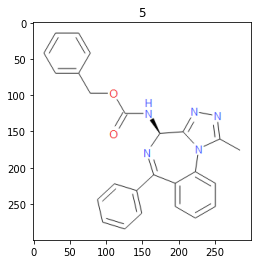

In [23]:
plt.imshow(compound_image_data[0])
plt.title(compound_ring_cats[0])
plt.show()

In [24]:
model = keras.Sequential(
    [
        keras.Input(shape=image_size + (3,)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(6, activation="softmax"),
    ]
)

In [25]:
batch_size = 12
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, keras.utils.to_categorical(y_train), batch_size=batch_size, epochs=epochs, validation_split=0.2)

2021-09-18 09:13:51.845017: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15
5/5 [==============================] - 3s 488ms/step - loss: 15.1504 - accuracy: 0.1167 - val_loss: 2.5438 - val_accuracy: 0.2667
Epoch 2/15
5/5 [==============================] - 2s 486ms/step - loss: 2.6265 - accuracy: 0.3333 - val_loss: 2.4918 - val_accuracy: 0.2000
Epoch 3/15
5/5 [==============================] - 2s 479ms/step - loss: 1.2205 - accuracy: 0.4833 - val_loss: 1.1975 - val_accuracy: 0.4667
Epoch 4/15
5/5 [==============================] - 2s 488ms/step - loss: 0.9113 - accuracy: 0.6500 - val_loss: 1.4554 - val_accuracy: 0.4000
Epoch 5/15
5/5 [==============================] - 2s 460ms/step - loss: 0.6196 - accuracy: 0.8167 - val_loss: 1.2343 - val_accuracy: 0.4667
Epoch 6/15
5/5 [==============================] - 2s 466ms/step - loss: 0.3337 - accuracy: 0.9500 - val_loss: 1.2919 - val_accuracy: 0.4000
Epoch 7/15
5/5 [==============================] - 2s 481ms/step - loss: 0.2004 - accuracy: 0.9667 - val_loss: 2.0321 - val_accuracy: 0.5333
Epoch 8/15
5/5 [===

In [26]:
score = model.evaluate(X_test, keras.utils.to_categorical(y_test), verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 2.2026610374450684
Test accuracy: 0.5600000023841858


## To Do 
* Make some simple metrics 
* Plot training curve 
* Use mlflow to record metrics and save model 

This model isn't great, it is overfit to the train set, but for now let's try and deploy it. We can come back later and improve the model.

In [14]:
import mlflow

In [28]:
with mlflow.start_run():
    mlflow.log_param("version", model_version)
    mlflow.log_metric("test_acc", score[1])
    mlflow.keras.save_model(model, "models/latest")

2021-09-18 09:15:55.819694: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /home/jovyan/data-science/models/latest/data/model/assets


In [29]:
test = mlflow.keras.load_model("models/latest")

In [31]:
test.predict(X_test)

array([[8.28274949e-12, 9.10880139e-12, 2.79447995e-03, 9.02322233e-01,
        7.11292913e-03, 8.77703577e-02],
       [2.15902536e-15, 2.72734868e-15, 4.00977029e-07, 2.83370668e-04,
        9.99641299e-01, 7.49596875e-05],
       [1.56292419e-14, 1.73600859e-14, 9.99769270e-01, 2.22741175e-04,
        5.88245121e-06, 2.16998455e-06],
       [6.58878541e-17, 8.28366260e-17, 2.47759200e-08, 1.22182144e-06,
        1.27025116e-02, 9.87296224e-01],
       [9.09691091e-14, 1.12219865e-13, 1.58341834e-06, 9.96127069e-01,
        3.08427913e-03, 7.87128927e-04],
       [1.02764885e-09, 1.16872412e-09, 2.78680697e-02, 8.07860076e-01,
        1.34459659e-01, 2.98121721e-02],
       [3.88917143e-13, 5.04815265e-13, 1.19442791e-06, 6.20969338e-03,
        2.88213015e-01, 7.05576062e-01],
       [7.86112508e-14, 9.15837095e-14, 9.27243906e-04, 1.95012353e-02,
        9.79364336e-01, 2.07184756e-04],
       [6.28106178e-10, 7.60910723e-10, 9.45471320e-03, 9.68633235e-01,
        1.28936339e-02, 

In [39]:
str(model.layers)

'[<keras.layers.convolutional.Conv2D object at 0x7efde94df340>, <keras.layers.pooling.MaxPooling2D object at 0x7efde94dfb50>, <keras.layers.convolutional.Conv2D object at 0x7efdef32dd60>, <keras.layers.pooling.MaxPooling2D object at 0x7efdef32d1c0>, <keras.layers.core.Flatten object at 0x7efde94891c0>, <keras.layers.core.Dropout object at 0x7efde9489790>, <keras.layers.core.Dense object at 0x7efde9489910>]'